<a href="https://colab.research.google.com/github/Pakhi27/Car-Price-Detection-Linear-regression/blob/main/Car_Price_Detection_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
df=pd.read_csv('quikr_car.csv')

In [123]:
dataset=pd.DataFrame(df)

In [124]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [ ]:
# Exploratory Data Analysis

In [125]:
df.isnull()

,name,company,year,Price,kms_driven,fuel_type
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
887,False,False,False,False,True,True
888,False,False,False,False,False,False
889,False,False,False,False,False,False
890,False,False,False,False,False,True


In [126]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [127]:
null_column='kms_driven'
df.dropna(subset=[null_column],axis=0,inplace=True)

In [128]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     3
dtype: int64

In [129]:
null_column1='fuel_type'
df.dropna(subset=[null_column1],axis=0,inplace=True)

In [130]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [131]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


In [ ]:
# Plots

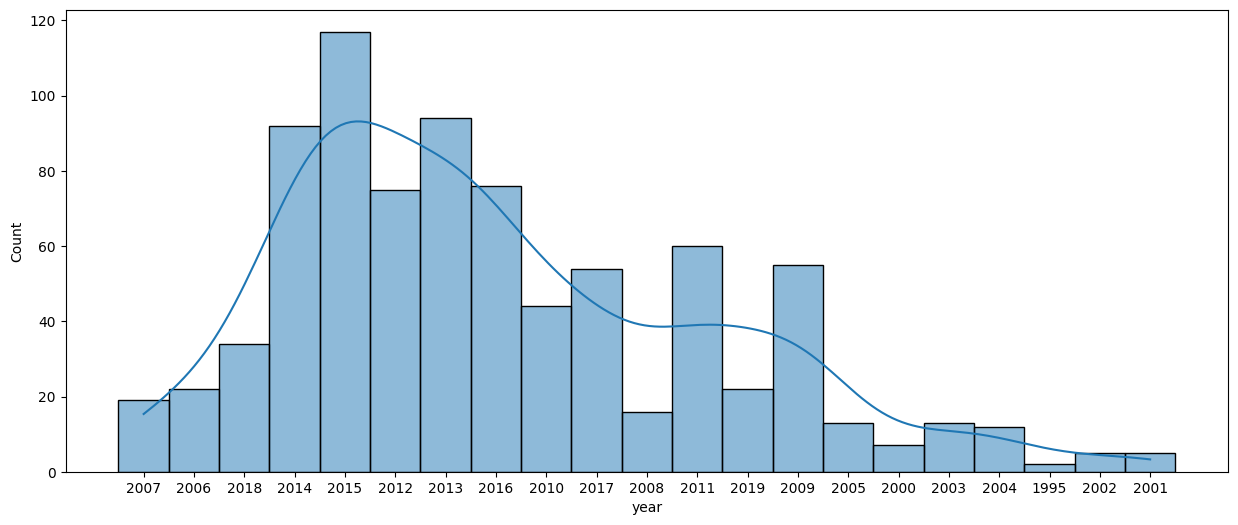

In [132]:
# Histogram of 'Year'
plt.figure(figsize=(15, 6))
sns.histplot(df['year'], kde=True)
plt.show()

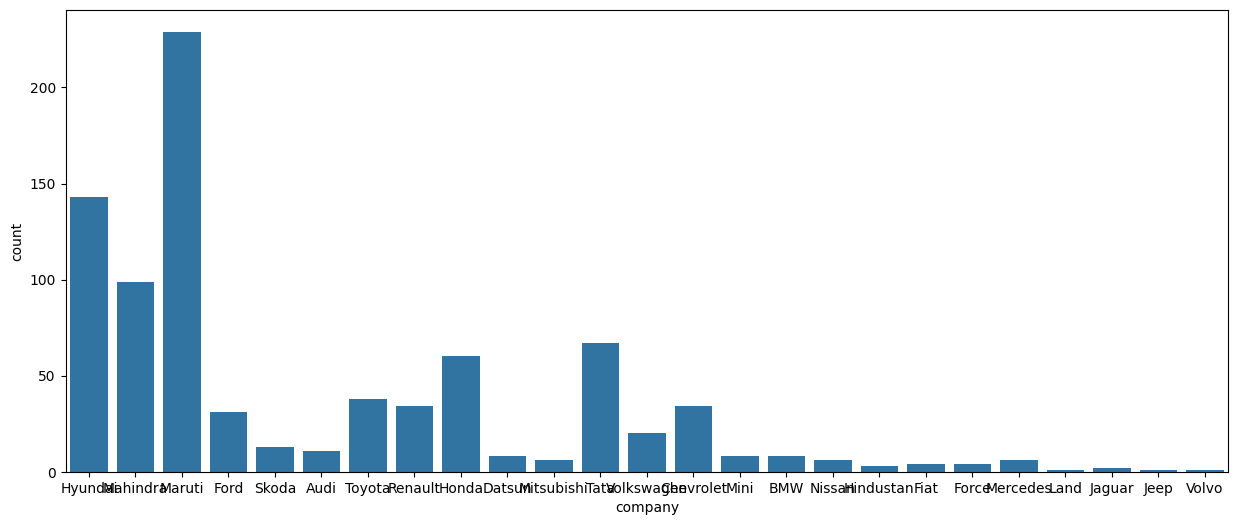

In [133]:
# Count plot of 'Company'
plt.figure(figsize=(15, 6))
sns.countplot(x='company', data=df)
plt.show()

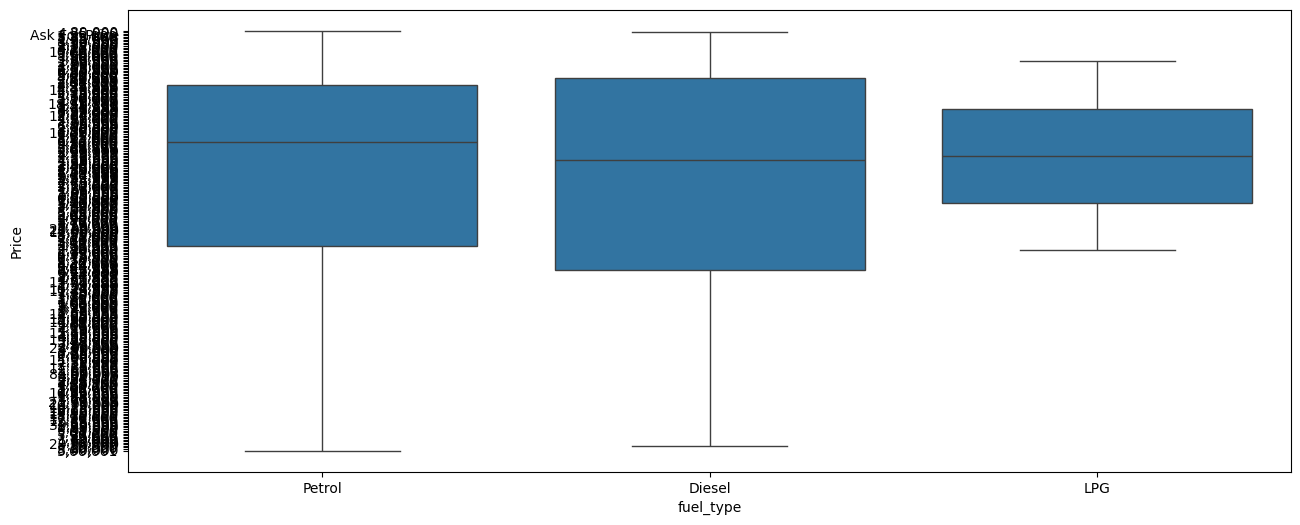

In [134]:
# Box plot of 'Price' by 'Fuel Type'
plt.figure(figsize=(15, 6))
sns.boxplot(x='fuel_type', y='Price', data=df)
plt.show()

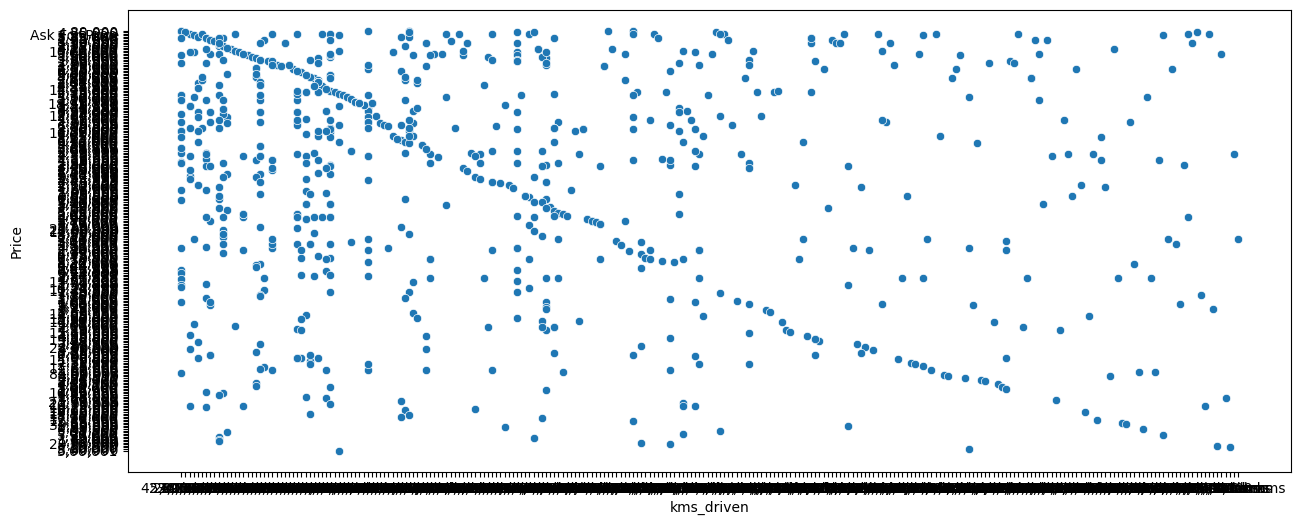

In [135]:
# Scatter plot of 'Price' vs 'Kms'
plt.figure(figsize=(15, 6))
sns.scatterplot(x='kms_driven', y='Price', data=df)
plt.show()

In [ ]:
# Preprocessing

In [136]:
# Convert to lower case
df['name'] = df['name'].apply(lambda x: x.lower())
df['company'] = df['company'].apply(lambda x: x.lower())
df

,name,company,year,Price,kms_driven,fuel_type
0,hyundai santro xing xo erlx euro iii,hyundai,2007,"80,000","45,000 kms",Petrol
1,mahindra jeep cl550 mdi,mahindra,2006,"4,25,000",40 kms,Diesel
2,maruti suzuki alto 800 vxi,maruti,2018,Ask For Price,"22,000 kms",Petrol
3,hyundai grand i10 magna 1.2 kappa vtvt,hyundai,2014,"3,25,000","28,000 kms",Petrol
4,ford ecosport titanium 1.5l tdci,ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
883,maruti suzuki ritz vxi abs,maruti,2011,"2,70,000","50,000 kms",Petrol
885,tata indica v2 dle bs iii,tata,2009,"1,10,000","30,000 kms",Diesel
886,toyota corolla altis,toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,tata zest xm diesel,tata,2018,"2,60,000","27,000 kms",Diesel


In [ ]:
# Removing stop words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
  words = text.lower().split()  # Tokenize and lowercase
  filtered_words = [word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

df['name'] = df['name'].apply(remove_stopwords)
df['company'] = df['company'].apply(remove_stopwords)

In [ ]:
# Removing numbers

In [ ]:
df.loc[:,'name'] = df.loc[:,'name'].str.replace(r"[^\w\s]", '', regex=True)
df.loc[:,'name'] = df.loc[:,'name'].str.strip()
df['name']


0       hyundai santro xing xo erlx euro iii
1                    mahindra jeep cl550 mdi
2                 maruti suzuki alto 800 vxi
3      hyundai grand i10 magna 12 kappa vtvt
4            ford ecosport titanium 15l tdci
                       ...                  
883               maruti suzuki ritz vxi abs
885                tata indica v2 dle bs iii
886                     toyota corolla altis
888                      tata zest xm diesel
889                       mahindra quanto c8
Name: name, Length: 837, dtype: object

In [ ]:
# # Remove Special characters
df.loc[:,'name'] = df.loc[:,'name'].str.replace(r"[^\w\s]", '', regex=True)
df.loc[:,'name'] = df.loc[:,'name'].str.strip()
df['name']

0       hyundai santro xing xo erlx euro iii
1                    mahindra jeep cl550 mdi
2                 maruti suzuki alto 800 vxi
3      hyundai grand i10 magna 12 kappa vtvt
4            ford ecosport titanium 15l tdci
                       ...                  
883               maruti suzuki ritz vxi abs
885                tata indica v2 dle bs iii
886                     toyota corolla altis
888                      tata zest xm diesel
889                       mahindra quanto c8
Name: name, Length: 837, dtype: object

In [ ]:
# Removing Whitespaces
df['name'] = df['name'].apply(lambda text: text.strip())
df

,name,company,year,Price,kms_driven,fuel_type
0,hyundai santro xing xo erlx euro iii,Hyundai,2007,"80,000","45,000 kms",Petrol
1,mahindra jeep cl550 mdi,Mahindra,2006,"4,25,000",40 kms,Diesel
2,maruti suzuki alto 800 vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,hyundai grand i10 magna 12 kappa vtvt,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,ford ecosport titanium 15l tdci,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
883,maruti suzuki ritz vxi abs,Maruti,2011,"2,70,000","50,000 kms",Petrol
885,tata indica v2 dle bs iii,Tata,2009,"1,10,000","30,000 kms",Diesel
886,toyota corolla altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,tata zest xm diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


In [137]:
# Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(df['name'])
tfidf_features = vectorizer.fit_transform(df['company'])
tfidf_features

<837x25 sparse matrix of type '<class 'numpy.float64'>'
	with 837 stored elements in Compressed Sparse Row format>

In [138]:
tfidf_features

<837x25 sparse matrix of type '<class 'numpy.float64'>'
	with 837 stored elements in Compressed Sparse Row format>

In [139]:
#Converting year to numeric values as it has non-year values
df=df[df['year'].str.isnumeric()]

In [140]:
#Change year object to integer
df.loc[:,'year']=df.loc[:,'year'].astype(int)

In [141]:
#Removing the 'Ask for Price' from Price column
df=df[df['Price']!='Ask For Price']

In [142]:
#Change Price from object to int and remove commas
df['Price']=df['Price'].str.replace(',','').astype(int)

In [143]:
#Removing 'kms' from kms_driven columns
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [145]:
#Removing nan values and 'Petrol' in two rows
df=df[df['kms_driven'].str.isnumeric()]

AttributeError: Can only use .str accessor with string values!

In [144]:
#Converting 'kms-driven' column to int
df['kms_driven']=df['kms_driven'].astype(int)

In [ ]:
#Removing nan values from 'fuel_type'
df=df[~df['fuel_type'].isna()]

In [ ]:
df.shape

(816, 6)

In [ ]:
#Changing car names by keeping only the first three words
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [ ]:
#Resetting the index of the final cleaned data
df=df.reset_index(drop=True)

In [ ]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
#Checking unique values of Company
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [ ]:
# Building a Linear Regression Model

In [ ]:
import sklearn as sk

In [ ]:
# x-independent variable
# y-dependent variable

# Splitting dependent and independent features

X=df[['name','company','year','kms_driven','fuel_type']]
y=df['Price']

In [ ]:
X


,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,36000,Diesel
6,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,27000,Diesel


In [ ]:
y.shape

(816,)

In [ ]:
# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
#Creating an OneHotEncoder object to contain all the possible categories
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [ ]:
#Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [ ]:
# Linear Regression model Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:

pipe=make_pipeline(column_trans,lr)

In [ ]:

pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
y_pred

array([ 2.47169731e+05,  4.51019355e+05,  2.70415678e+05,  2.83177270e+05,
        3.07977527e+05,  8.55541137e+05,  4.23051753e+05,  4.65964690e+04,
        5.14463480e+05,  3.99025653e+05,  8.06609484e+04,  5.66264571e+05,
        3.48838971e+05,  4.64889088e+05,  5.30055570e+05,  2.46084041e+05,
        7.40193003e+05,  5.60410261e+05,  3.07458317e+05,  6.78101438e+05,
        4.46130958e+05,  1.76253758e+05,  2.00352110e+06,  4.58616764e+05,
        2.64595164e+05,  5.92604081e+05, -1.28834636e+05, -9.60069994e+03,
        3.26309486e+04,  1.79831759e+05,  6.67957200e+05,  2.74518465e+05,
       -8.89269477e+04,  1.74316058e+05, -2.41327284e+04,  7.27460814e+05,
        4.15604980e+04,  4.93464715e+05,  1.13919889e+05,  3.05046965e+05,
        2.84901869e+05, -6.31386053e+04,  2.74994098e+05,  1.76546814e+05,
        4.45230770e+05,  3.71704525e+05,  1.46169055e+05,  2.60171766e+05,
        2.36902219e+05,  5.27233079e+05,  4.02286690e+05,  4.86364629e+05,
        7.97614449e+05,  

In [ ]:
r2_score(y_test,y_pred)
# accuracy-33%

0.3372605951562232

In [ ]:
# To improve accuracy-running a loop to find the best random state

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

144

In [ ]:
scores[np.argmax(scores)]

0.8552075102594738

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)
# accuracy imporoved-85.5%

0.8552075102594738